In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
#from getdist import plots, MCSamples
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9.8


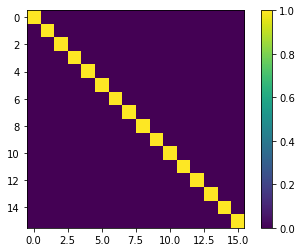

In [4]:
ndim = 16
nwalkers = 2 * ndim #* 2
nsteps= 1000

#C = make_spd_matrix(ndim)
C = np.identity(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

#mu = np.random.rand(ndim) * 10.0
mu  = np.zeros(ndim)

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

#start = np.random.rand(ndim)
start = mu + 1.0 * np.random.randn(nwalkers,ndim)

In [3]:
ndim = 16
nwalkers = 2 * ndim #* 2
nsteps= int(100000 / nwalkers)

def logp(x):
    a = 1.0
    b = 0.5
    first = -0.5*(x[0]**2.0 / a**2.0) - 0.5 * np.log(2.0 * np.pi) - np.log(a)
    rest = -0.5*np.sum(x[1:]**2.0 / np.exp(2*b*x[0])) -0.5*np.log(2.0 *np.pi) - (ndim-1) * b * x[0]
    return first + rest

start =np.random.randn(nwalkers,ndim)

In [ ]:
ndim = 2
nwalkers = 2*ndim*2
nsteps= 10000

def logp(x):
    return -100*(x[1]-x[0]**2.0)**2.0 - (1-x[0])**2.0

start = np.random.randn(nwalkers,ndim)

In [ ]:
def logp(x):
    return -np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1.0-x[:-1])**2.0)

In [ ]:
from multiprocessing import Pool

with Pool() as pool:
    sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], pool=pool)
    sampler.run(start, nsteps)

In [5]:
#sampler = zeus.sampler(logp, nwalkers, ndim, jump=0.0)
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], jump=0.0, mu=1.0)
sampler.run(start, nsteps)

Initialising ensemble of 32 walkers...
Sampling progress : 100%|██████████| 1000/1000 [00:01<00:00, 634.97it/s]


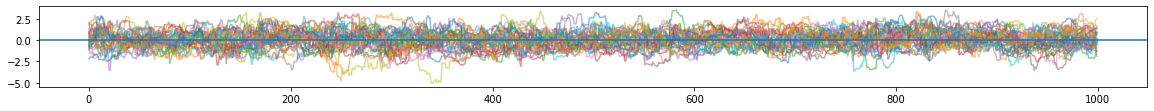

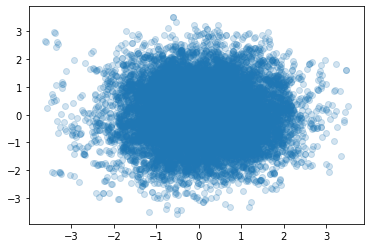

Summary
-------
Number of Generations: 1000
Number of Parameters: 16
Number of Walkers: 32
Mean Integrated Autocorrelation Time: 21.3
Effective Sample Size: 1502.42
Number of Log Probability Evaluations: 113823.0
Effective Samples per Log Probability Evaluation: 0.0132


MCMC mean: [ 0.09553111  0.02943977  0.06754289 -0.08008358  0.01472294  0.00024487
 -0.03406163 -0.00290096 -0.01163584 -0.03120253  0.0505756  -0.03680503
  0.00468797 -0.08096798  0.00730973 -0.00239451]
TRUE mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
MCMC std: [0.98443278 1.01587222 0.98011419 1.00588114 0.97907379 0.96371699
 1.02072917 1.0257446  1.00252377 1.02411606 1.00190305 1.02826833
 1.00823338 0.99071097 0.9885187  0.98217246]
TRUE std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(1):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten(burn=int(nsteps/2))
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()

print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))

sampler.summary

In [7]:
sampler.efficiency

0.013199657076369362

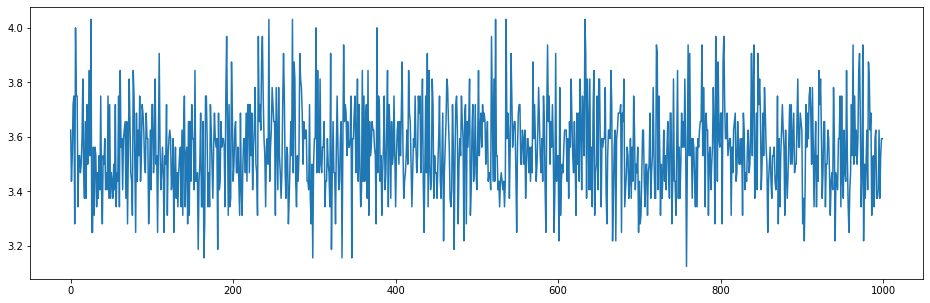

In [8]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(nsteps),sampler.neval/nwalkers)
plt.show()

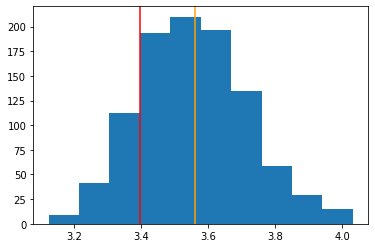

3.5603125
3.3961470561065


In [9]:
mean_mu = np.mean(sampler.neval[int(nsteps/2):]/nwalkers)
std_mu = np.std(sampler.neval[int(nsteps/2):]/nwalkers)

plt.hist(sampler.neval/nwalkers)
plt.axvline(x=mean_mu, color='orange')
plt.axvline(x=mean_mu - std_mu, color='red')
plt.show()

print(mean_mu)
print(mean_mu - std_mu)